## Team 2: Michael Kolor and Nikita Roy

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.api import OLS
import seaborn as sns
%matplotlib inline

/Users/nikitaroy/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
results_data = pd.read_csv("international_results.csv")
results_data['date'] = pd.to_datetime(results_data['date'], yearfirst = True)

#Remove rows that included the FIFA 2018 results
result_data = results_data.loc[results_data['date'] < '2018-06-14']
result_data.head()

#Create subset dataframe that includes only matches played between 2014 FIFA till 2018 FIFA
results_2014 = result_data.copy().loc[results_data.copy()['date'] > '2014-07-13']
results_2014.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
35983,2014-07-14,Botswana,Lesotho,2,0,Friendly,Gaborone,Botswana,False
35984,2014-07-14,Qatar,Indonesia,2,2,Friendly,al-Wakrah,Qatar,False
35985,2014-07-15,Kenya,Burundi,0,0,Friendly,Nairobi,Kenya,False
35986,2014-07-15,Uganda,Malawi,0,0,Friendly,Kampala,Uganda,False
35987,2014-07-19,Botswana,Guinea-Bissau,2,0,African Cup of Nations qualification,Gaborone,Botswana,False


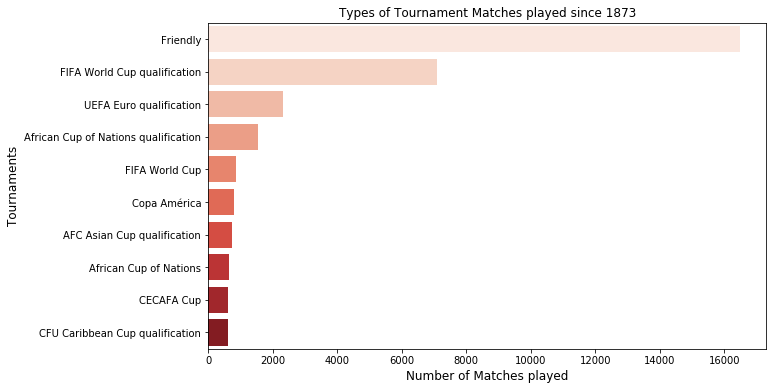

In [3]:
#Create dataframe to get the total tournaments played
tournaments = results_data.groupby('tournament')['date'].count()
tournaments = tournaments.to_frame()
tournaments.columns = ['counts']
tournaments = tournaments.sort_values(by = ['counts'], ascending = False)
tournaments = tournaments.head(10)
tournaments = tournaments.reset_index()
tournaments

#Create barplot to show the which tournaments are most played
fig, ax = plt.subplots(1,1, figsize = (10,6))
sns.barplot(x = 'counts', y = 'tournament', data = tournaments, palette = 'Reds')
ax.set_xlabel("Number of Matches played", fontsize = 12)
ax.set_ylabel("Tournaments", fontsize = 12)
ax.set_title("Types of Tournament Matches played since 1873");

Text(0.5,1,'Types of Tournament Matches played since 2014')

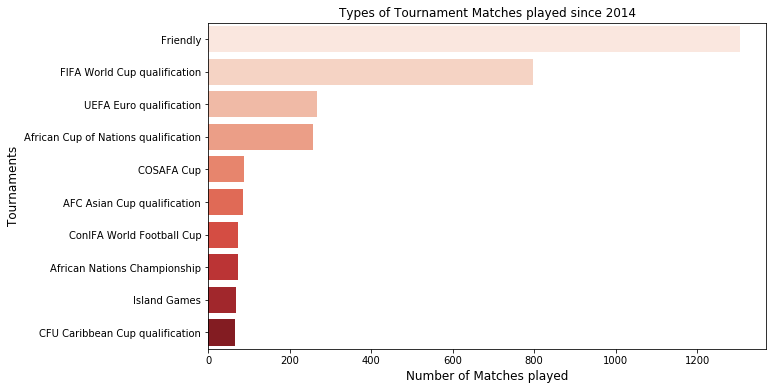

In [4]:
#Create dataframe to get the total tournaments played since 2014
tournaments = results_2014.groupby('tournament')['date'].count()
tournaments = tournaments.to_frame()
tournaments.columns = ['counts']
tournaments = tournaments.sort_values(by = ['counts'], ascending = False)
tournaments = tournaments.head(10)
tournaments = tournaments.reset_index()
tournaments

#Create barplot to show the which tournaments are most played
fig, ax = plt.subplots(1,1, figsize = (10,6))
sns.barplot(x = 'counts', y = 'tournament', data = tournaments, palette = 'Reds')
ax.set_xlabel("Number of Matches played", fontsize = 12)
ax.set_ylabel("Tournaments", fontsize = 12)
ax.set_title("Types of Tournament Matches played since 2014")



In [5]:
#Initializing new columns to create get results
results_data['home_tie'] = 0
results_data['home_win'] = 0
results_data['home_loss'] = 0
results_data['away_tie'] = 0
results_data['away_win'] = 0
results_data['away_loss'] = 0

#Setting condition for the created columns
results_data.loc[results_data['home_score'] == results_data['away_score'], 'home_tie'] = 1
results_data.loc[results_data['home_score'] > results_data['away_score'], 'home_win'] = 1
results_data.loc[results_data['home_score'] < results_data['away_score'], 'home_loss'] = 1
results_data.loc[results_data['home_score'] == results_data['away_score'], 'away_tie'] = 1
results_data.loc[results_data['home_score'] < results_data['away_score'], 'away_win'] = 1
results_data.loc[results_data['home_score'] > results_data['away_score'], 'away_loss'] = 1

results_data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_tie,home_win,home_loss,away_tie,away_win,away_loss
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1,0,0,1,0,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,0,1,0,0,0,1
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,0,1,0,0,0,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1,0,0,1,0,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,0,1,0,0,0,1


In [6]:
#Initializing new columns to create get results
results_2014['home_tie'] = 0
results_2014['home_win'] = 0
results_2014['home_loss'] = 0
results_2014['away_tie'] = 0
results_2014['away_win'] = 0
results_2014['away_loss'] = 0

#Setting condition for the created columns
results_2014.loc[results_2014['home_score'] == results_2014['away_score'], 'home_tie'] = 1
results_2014.loc[results_2014['home_score'] > results_2014['away_score'], 'home_win'] = 1
results_2014.loc[results_2014['home_score'] < results_2014['away_score'], 'home_loss'] = 1
results_2014.loc[results_2014['home_score'] == results_2014['away_score'], 'away_tie'] = 1
results_2014.loc[results_2014['home_score'] < results_2014['away_score'], 'away_win'] = 1
results_2014.loc[results_2014['home_score'] > results_2014['away_score'], 'away_loss'] = 1

results_2014.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_tie,home_win,home_loss,away_tie,away_win,away_loss
35983,2014-07-14,Botswana,Lesotho,2,0,Friendly,Gaborone,Botswana,False,0,1,0,0,0,1
35984,2014-07-14,Qatar,Indonesia,2,2,Friendly,al-Wakrah,Qatar,False,1,0,0,1,0,0
35985,2014-07-15,Kenya,Burundi,0,0,Friendly,Nairobi,Kenya,False,1,0,0,1,0,0
35986,2014-07-15,Uganda,Malawi,0,0,Friendly,Kampala,Uganda,False,1,0,0,1,0,0
35987,2014-07-19,Botswana,Guinea-Bissau,2,0,African Cup of Nations qualification,Gaborone,Botswana,False,0,1,0,0,0,1


In [7]:
#Creating new dataframe home_counts that gives us the number of matches played at home
home_counts = results_data.groupby('home_team')['home_score'].count()
home_counts = home_counts.to_frame()
home_counts = home_counts.reindex()
home_counts.columns= ['matches_played']
home_counts.head()

#Creating new dataframe away_counts that gives us the number of matches played at home
away_counts = results_data.groupby('away_team')['away_score'].count()
away_counts = away_counts.to_frame()
away_counts = away_counts.reindex()
away_counts.columns= ['matches_played']
away_counts.head()

,matches_played
away_team,
Abkhazia,7
Afghanistan,67
Albania,150
Alderney,10
Algeria,203


In [8]:
#Creating new dataframe home_counts_2014 that gives us the number of matches played at home since 2014
home_counts_2014 = results_2014.groupby('home_team')['home_score'].count()
home_counts_2014 = home_counts_2014.to_frame()
home_counts_2014 = home_counts_2014.reindex()
home_counts_2014.columns= ['matches_played']
home_counts_2014.head()

#Creating new dataframe away_counts_2014 that gives us the number of matches played at home since 2014
away_counts_2014 = results_2014.groupby('away_team')['away_score'].count()
away_counts_2014 = away_counts_2014.to_frame()
away_counts_2014 = away_counts_2014.reindex()
away_counts_2014.columns= ['matches_played']
away_counts_2014.head()

,matches_played
away_team,
Abkhazia,5
Afghanistan,17
Albania,18
Alderney,6
Algeria,18


In [9]:
#Creating a new data frame to get the grouped by values of wins, losses and ties for matches played at home
home_total = results_data.groupby(['home_team']).sum()
home_total = home_total[['home_tie', 'home_win', 'home_loss']]
home_total['home_win_percentage'] = home_total['home_win'] / home_counts['matches_played'] *100
home_total['home_loss_percentage'] = home_total['home_loss'] / home_counts['matches_played'] *100
home_total['home_tie_percentage'] = home_total['home_tie'] / home_counts['matches_played'] *100

#Creating a new data frame to get the grouped by values of wins, losses and ties for matches played away
away_total = results_data.groupby(['away_team']).sum()
away_total= away_total[['away_tie', 'away_win', 'away_loss']]
away_total['away_win_percentage'] = away_total['away_win'] / away_counts['matches_played'] *100
away_total['away_loss_percentage'] = away_total['away_loss'] / away_counts['matches_played'] *100
away_total['away_tie_percentage'] = away_total['away_tie'] / away_counts['matches_played'] *100
away_total.head()

,away_tie,away_win,away_loss,away_win_percentage,away_loss_percentage,away_tie_percentage
away_team,,,,,,
Abkhazia,4,2,1,28.571429,14.285714,57.142857
Afghanistan,15,13,39,19.402985,58.208955,22.388060
Albania,27,20,103,13.333333,68.666667,18.000000
Alderney,0,2,8,20.000000,80.000000,0.000000
Algeria,64,48,91,23.645320,44.827586,31.527094


In [10]:
#Creating a new data frame to get the grouped by values of wins, losses and ties for matches played at home SINCE 2014
home_total_2014 = results_2014.groupby(['home_team']).sum()
home_total_2014 = home_total_2014[['home_tie', 'home_win', 'home_loss']]
home_total_2014['home_win_percentage'] = home_total_2014['home_win'] / home_counts_2014['matches_played'] *100
home_total_2014['home_loss_percentage'] = home_total_2014['home_loss'] / home_counts_2014['matches_played'] *100
home_total_2014['home_tie_percentage'] = home_total_2014['home_tie'] / home_counts_2014['matches_played'] *100

#Creating a new data frame to get the grouped by values of wins, losses and ties for matches played away SINCE 2014
away_total_2014 = results_2014.groupby(['away_team']).sum()
away_total_2014= away_total_2014[['away_tie', 'away_win', 'away_loss']]
away_total_2014['away_win_percentage'] = away_total_2014['away_win'] / away_counts_2014['matches_played'] *100
away_total_2014['away_loss_percentage'] = away_total_2014['away_loss'] / away_counts_2014['matches_played'] *100
away_total_2014['away_tie_percentage'] = away_total_2014['away_tie'] / away_counts_2014['matches_played'] *100
away_total_2014.head()

,away_tie,away_win,away_loss,away_win_percentage,away_loss_percentage,away_tie_percentage
away_team,,,,,,
Abkhazia,3,1,1,20.000000,20.000000,60.000000
Afghanistan,3,3,11,17.647059,64.705882,17.647059
Albania,4,8,6,44.444444,33.333333,22.222222
Alderney,0,1,5,16.666667,83.333333,0.000000
Algeria,4,6,8,33.333333,44.444444,22.222222


In [11]:
#Create list of countries that were in the world cup
wc_countries = ['Russia', 'Belgium', 'Germany', 'England', 'Spain', 'Poland', 'Iceland', 'Serbia', 'France', 'Portugal', 'Switzerland', 'Croatia', 'Sweden', 'Denmark', 'Iran', 'South Korea', 'Japan', 'Saudi Arabia', 'Australia', 'Nigeria', 'Egypt', 'Senegal', 'Tunisia', 'Morocco', 'Mexico', 'Costa Rica', 'Panama', 'Brazil', 'Uruguay', 'Argentina', 'Colombia', 'Peru', 'Korea Republic']


In [12]:
#Selecting only countries that were in the world cup
home_total = home_total.loc[home_total.index.isin(wc_countries)]
away_total = away_total.loc[away_total.index.isin(wc_countries)]
home_counts = home_counts.loc[home_counts.index.isin(wc_countries)]
away_counts = away_counts.loc[away_counts.index.isin(wc_countries)]
home_counts['Country'] = home_counts.index
away_counts['Country'] = away_counts.index

In [13]:
#Selecting only countries that were in the world cup
home_total_2014 = home_total_2014.loc[home_total_2014.index.isin(wc_countries)]
away_total_2014 = away_total_2014.loc[away_total_2014.index.isin(wc_countries)]
home_counts_2014 = home_counts_2014.loc[home_counts_2014.index.isin(wc_countries)]
away_counts_2014 = away_counts_2014.loc[away_counts_2014.index.isin(wc_countries)]
home_counts_2014['Country'] = home_counts_2014.index
away_counts_2014['Country'] = away_counts_2014.index

In [14]:
#Creating a new dataframe wc_total that includes the all the countries in the world cup and their home and away win percentages
wc_total = pd.DataFrame(columns = ['Country', 'Home', 'Away'])
wc_total['Country'] = home_total.index
wc_total['Home'] = home_total['home_win'].values / home_counts['matches_played'].values *100

wc_total['Away'] = away_total['away_win'].values / away_counts['matches_played'].values *100
wc_total_wide = wc_total
wc_total = pd.melt(wc_total, id_vars = ['Country'], value_vars = ['Away', 'Home'])

wc_total.head()


,Country,variable,value
0,Argentina,Away,37.619048
1,Australia,Away,40.092166
2,Belgium,Away,31.213873
3,Brazil,Away,52.970297
4,Colombia,Away,28.057554


In [15]:
#Creating a new dataframe wc_total_2014_2014 that includes the all the countries 
#SINCE 2014 in the world cup and their home and away win percentages

wc_total_2014 = pd.DataFrame(columns = ['Country', 'Home', 'Away'])
wc_total_2014['Country'] = home_total_2014.index
wc_total_2014['Home'] = home_total_2014['home_win'].values / home_counts_2014['matches_played'].values *100

wc_total_2014['Away'] = away_total_2014['away_win'].values / away_counts_2014['matches_played'].values *100
wc_total_wide_2014 = wc_total_2014
wc_total_2014 = pd.melt(wc_total_2014, id_vars = ['Country'], value_vars = ['Away', 'Home'])

wc_total_2014.head()



,Country,variable,value
0,Argentina,Away,47.368421
1,Australia,Away,26.086957
2,Belgium,Away,66.666667
3,Brazil,Away,69.565217
4,Colombia,Away,52.000000


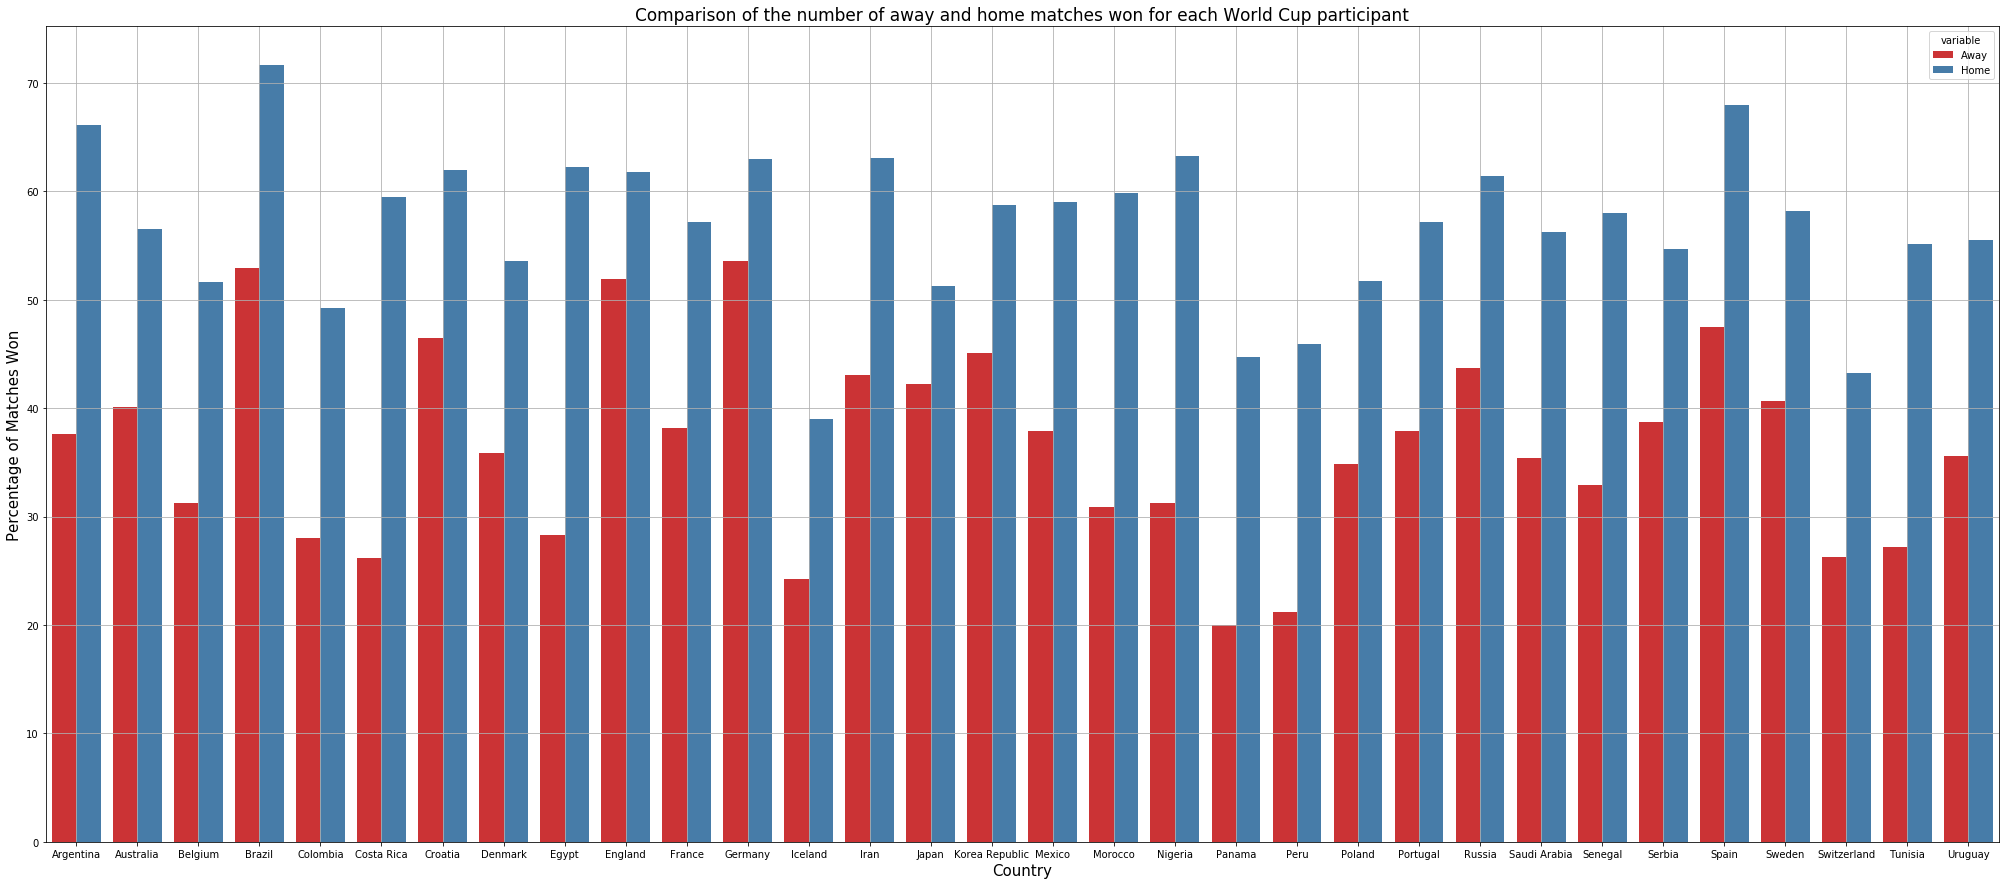

In [16]:
#Create a bar plot to compare the home and away win percentages for each country in the world cup
fig, ax = plt.subplots(1,1, figsize = (35, 15))
sns.set_palette('Set1')
sns.barplot(x="Country", y="value", hue = "variable" ,data=wc_total)
ax.set_xlabel('Country', fontsize = 15)
ax.set_ylabel('Percentage of Matches Won', fontsize = 15)
ax.set_title('Comparison of the number of away and home matches won for each World Cup participant', fontsize = 17)
ax.grid(True)

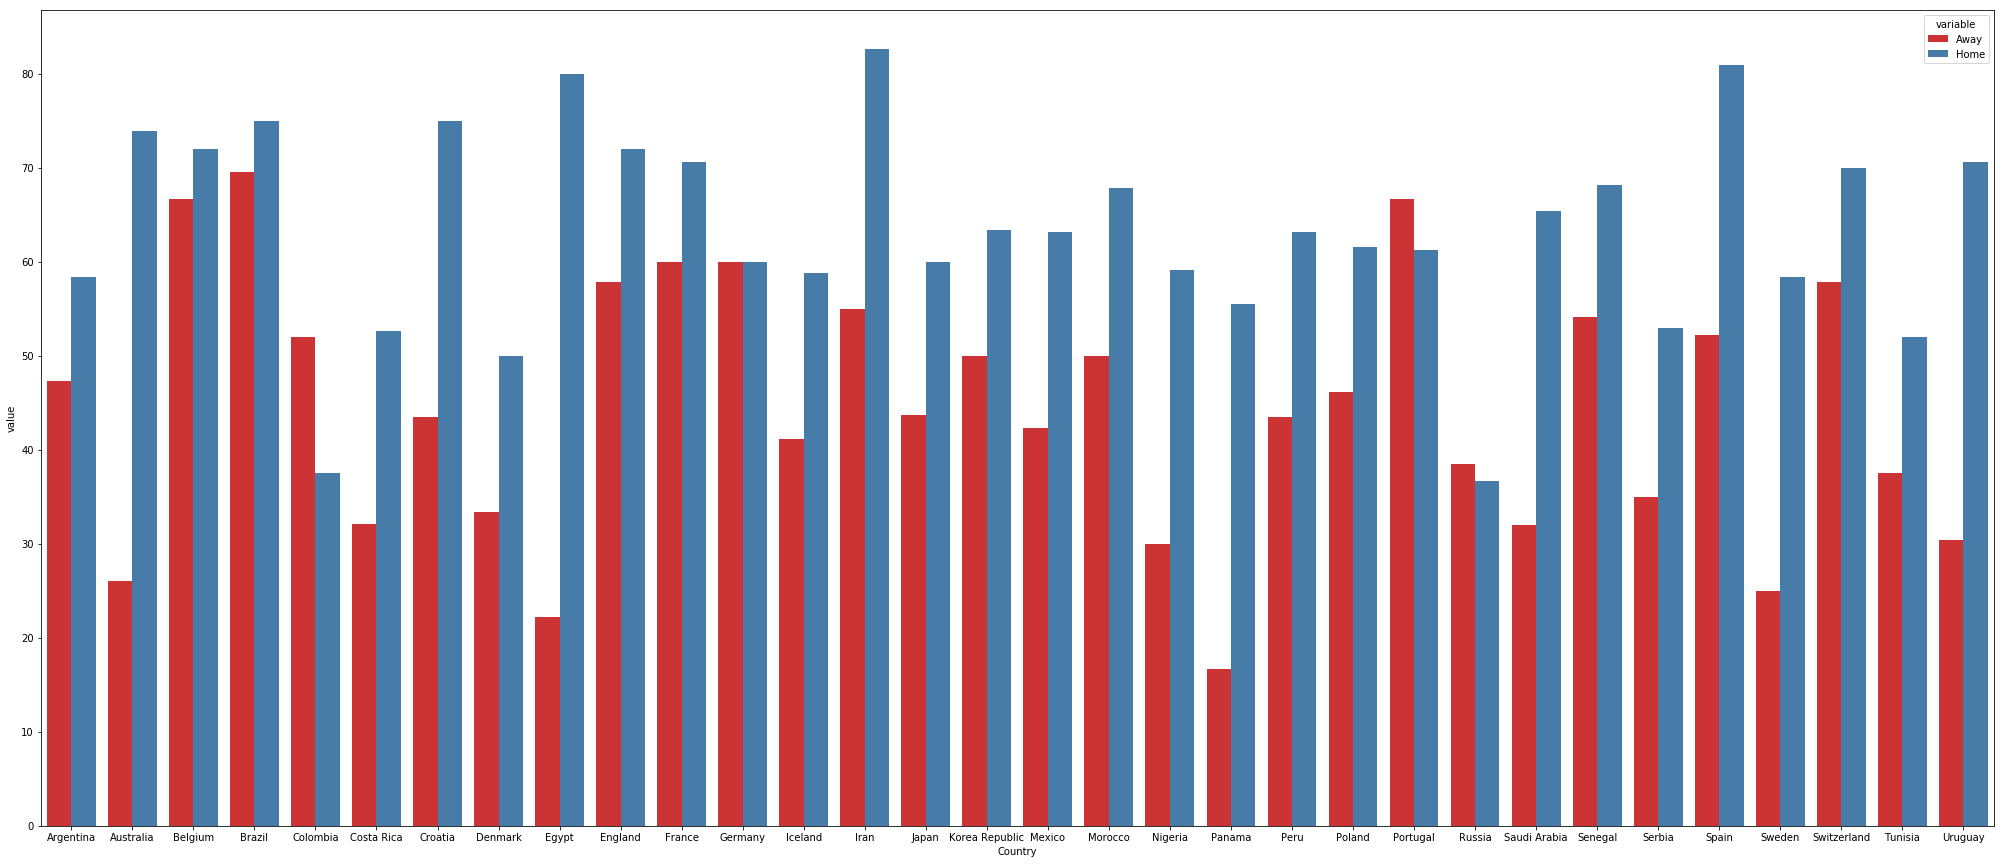

In [17]:
#Create a bar plot to compare the home and away win percentages for each country in the world cup 
#SINCE 2014
fig, ax = plt.subplots(1,1, figsize = (35, 15))
sns.set_palette('Set1')
sns.barplot(x="Country", y="value", hue = "variable" ,data=wc_total_2014)

In [18]:
#Create a new dataframe that has the country and the difference in win percentage
wc_result_diff = pd.DataFrame(columns = ["Country", "Difference"])
wc_result_diff["Country"] = wc_total_wide["Country"]
wc_result_diff["Difference"] = wc_total_wide['Home'].values - wc_total_wide['Away'].values
wc_result_diff = wc_result_diff.sort_values(by = "Difference", ascending = False)


In [19]:
#Create a new dataframe that has the country and the difference in win percentage
#SINCE 2014
wc_result_diff_2014 = pd.DataFrame(columns = ["Country", "Difference"])
wc_result_diff_2014["Country"] = wc_total_wide_2014["Country"]
wc_result_diff_2014["Difference"] = wc_total_wide_2014['Home'].values - wc_total_wide_2014['Away'].values
wc_result_diff_2014 = wc_result_diff_2014.sort_values(by = "Difference", ascending = False)
wc_result_diff_2014.reset_index()
wc_result_diff_2014.head()

,Country,Difference
8,Egypt,57.777778
1,Australia,47.826087
31,Uruguay,40.153453
19,Panama,38.888889
24,Saudi Arabia,33.384615


Text(0.5,1,'Difference in win percentage between home and away matches')

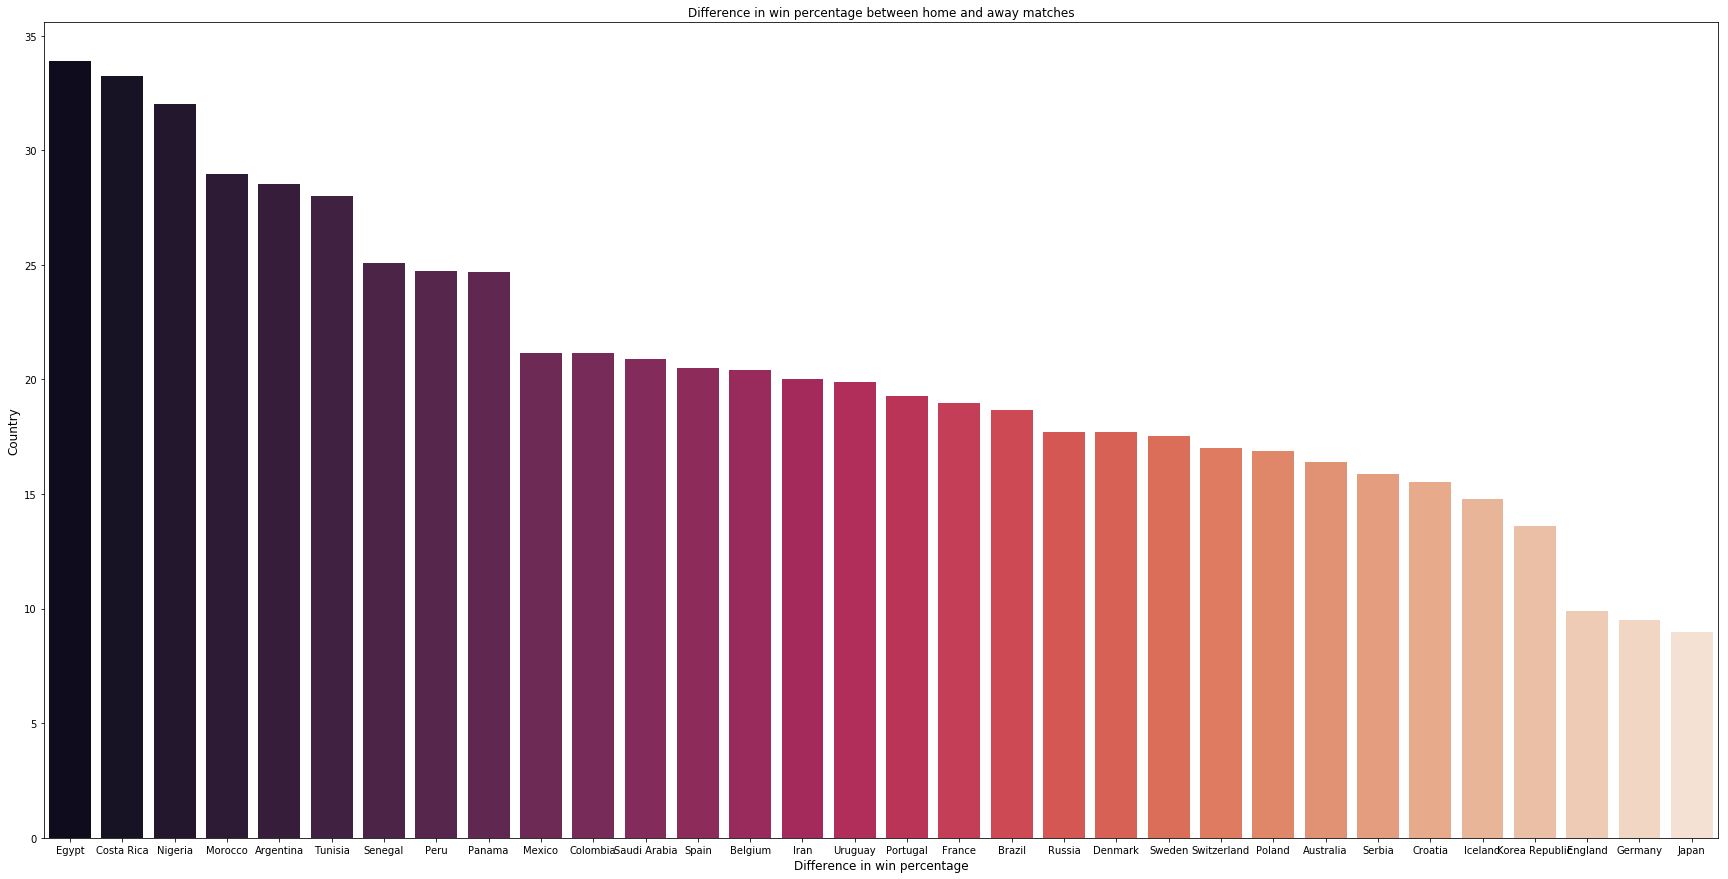

In [20]:
fig, ax = plt.subplots(1,1,figsize = (30,15))
sns.barplot(x = 'Country', y = 'Difference', data = wc_result_diff, palette = "rocket");
ax.set_xlabel('Difference in win percentage', fontsize = 12)
ax.set_ylabel('Country', fontsize = 12)
ax.set_title('Difference in win percentage between home and away matches')

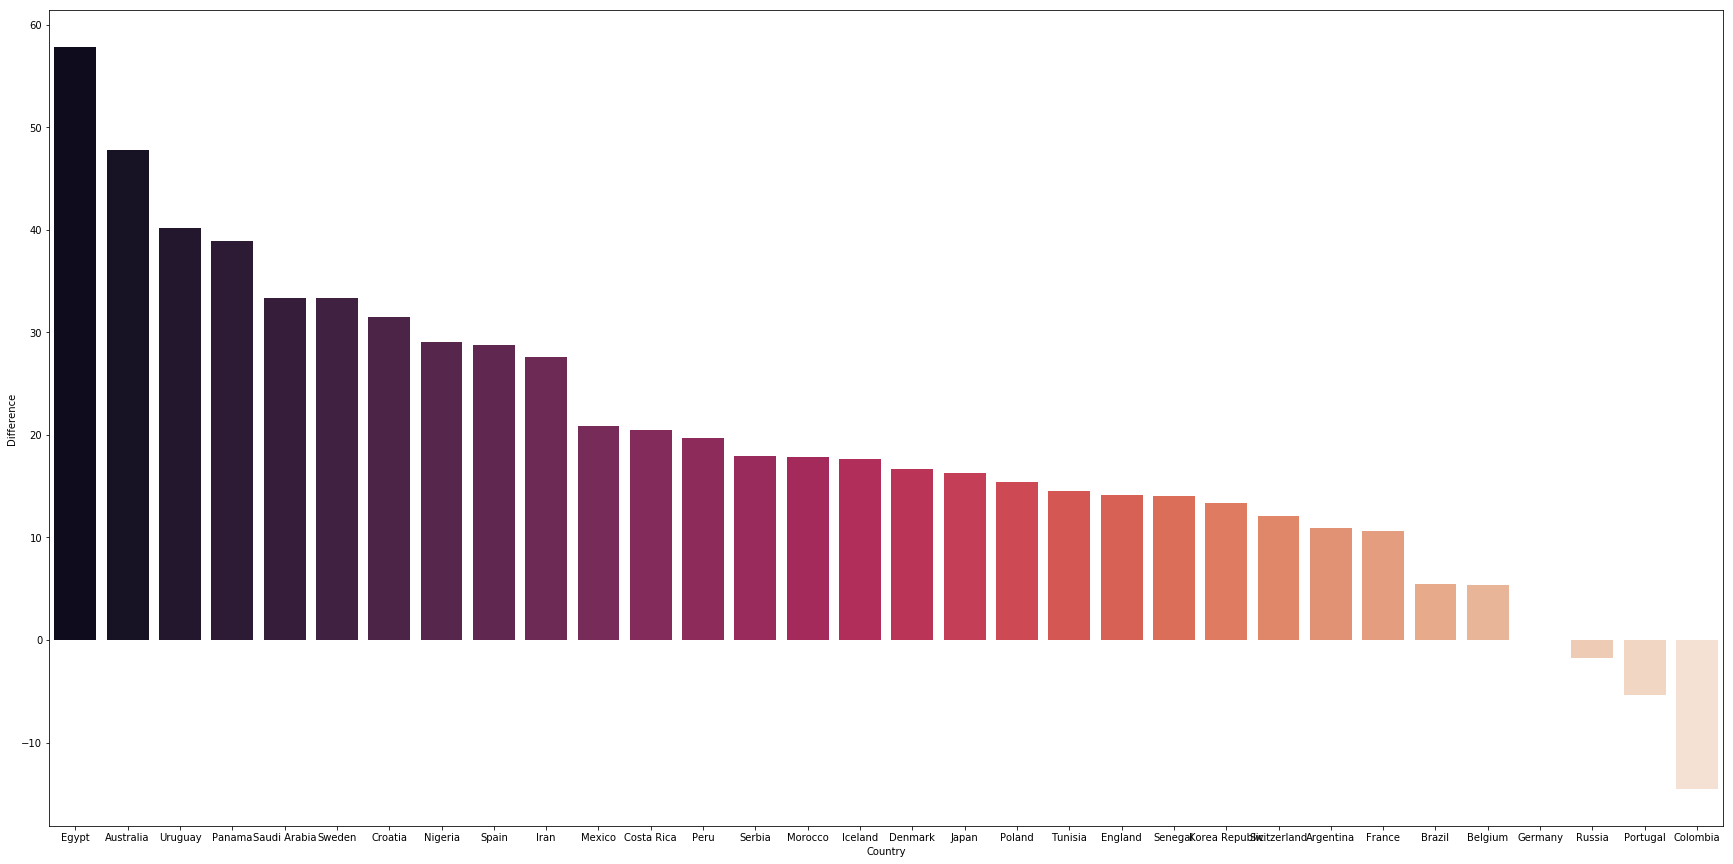

In [21]:
fig, ax = plt.subplots(1,1,figsize = (30,15))
sns.barplot(x = 'Country', y = 'Difference', data = wc_result_diff_2014, palette = "rocket");

In [22]:
#Read in World Cup data 
wc_2018_data = pd.read_csv("wc_2018_dataset.csv")
wc_2018_data.head()

,Team,Group,Previous appearances appearances,Previous titles titles,Previous finals,Previous semifinals,Current FIFA rank,First match against,Match index,history with first opponent W-L,history with first opponent goals,Second match against,Match index.1,history with second opponent W-L,history with second opponent goals,Third match against,Match index.2,history with third opponent W-L,history with third opponent goals
0,Russia,A,10,0,0,1,65,Saudi Arabia,1,-1.0,-2.0,Egypt,17,NaN,NaN,Uruguay,33,0.0,0.0
1,Saudi Arabia,A,4,0,0,0,63,Russia,1,1.0,2.0,Uruguay,18,1.0,1.0,Egypt,34,-5.0,-5.0
2,Egypt,A,2,0,0,0,31,Uruguay,2,-1.0,-2.0,Russia,17,NaN,NaN,Saudi Arabia,34,5.0,5.0
3,Uruguay,A,12,2,2,5,21,Egypt,2,1.0,2.0,Saudi Arabia,18,-1.0,-1.0,Russia,33,0.0,0.0
4,Portugal,B,6,0,0,2,3,Spain,3,-12.0,-31.0,Morocco,19,-1.0,-2.0,Iran,35,2.0,5.0


In [23]:
#Create a new dataframe that merges the world cup data and home and away win percentage
wc_diff_rank = wc_result_diff.merge(wc_2018_data, left_on = 'Country', right_on = 'Team', how = 'inner')
#Select only difference in win percentage and FIFA rank
wc_result_diff = wc_diff_rank.copy()[['Country', 'Difference', 'Current \rFIFA rank']]
wc_result_diff.columns = ['Country', 'Difference', 'Rank']
wc_result_diff.head()

,Country,Difference,Rank
0,Egypt,33.888180,31
1,Nigeria,32.009772,50
2,Morocco,28.984287,40
3,Argentina,28.549177,4
4,Tunisia,28.002602,27


In [24]:
#Create a new dataframe that merges the world cup data and home and away win percentage
wc_diff_rank_2014 = wc_result_diff_2014.merge(wc_2018_data, left_on = 'Country', right_on = 'Team', how = 'inner')
#Select only difference in win percentage and FIFA rank
wc_result_diff_2014 = wc_diff_rank_2014.copy()[['Country', 'Difference', 'Current \rFIFA rank']]
wc_result_diff_2014.columns = ['Country', 'Difference', 'Rank']
wc_result_diff_2014.head()

,Country,Difference,Rank
0,Egypt,57.777778,31
1,Australia,47.826087,39
2,Uruguay,40.153453,21
3,Panama,38.888889,56
4,Saudi Arabia,33.384615,63


In [25]:
wc_result_diff

,Country,Difference,Rank
0,Egypt,33.888180,31
1,Nigeria,32.009772,50
2,Morocco,28.984287,40
3,Argentina,28.549177,4
4,Tunisia,28.002602,27
5,Senegal,25.080649,23
6,Peru,24.713805,11
7,Panama,24.680851,56
8,Mexico,21.165097,16
9,Saudi Arabia,20.894768,63


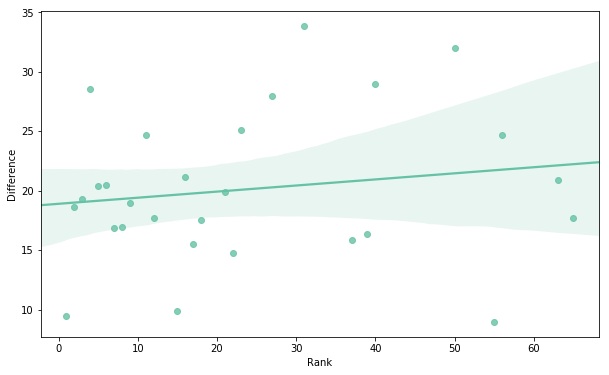

In [27]:
#Create a scatterplot to see if there is a correlation between rank and difference in win percentage
fig, ax = plt.subplots(1,1, figsize = (10,6))
sns.set_palette('Set2')
sns.regplot(x = 'Rank', y = 'Difference', data = wc_result_diff)


In [30]:
# Creating a subset of wc_result_diff to remove Japan since it seems like an outlier
no_japan = wc_result_diff[wc_result_diff.Country != 'Japan']
no_japan



,Country,Difference,Rank
0,Egypt,33.888180,31
1,Nigeria,32.009772,50
2,Morocco,28.984287,40
3,Argentina,28.549177,4
4,Tunisia,28.002602,27
5,Senegal,25.080649,23
6,Peru,24.713805,11
7,Panama,24.680851,56
8,Mexico,21.165097,16
9,Saudi Arabia,20.894768,63


Text(0.5,1,'Correlation between win percentage and FIFA rank of countries')

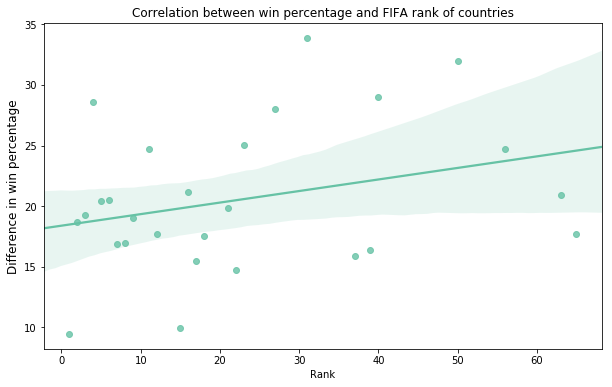

In [31]:


#Create a scatterplot without Japan
fig, ax = plt.subplots(1,1, figsize = (10,6))
sns.set_palette('Set2')
sns.regplot(x = 'Rank', y = 'Difference', data = no_japan)
ax.set_ylabel('Difference in win percentage', fontsize = 12)
ax.set_title('Correlation between win percentage and FIFA rank of countries')

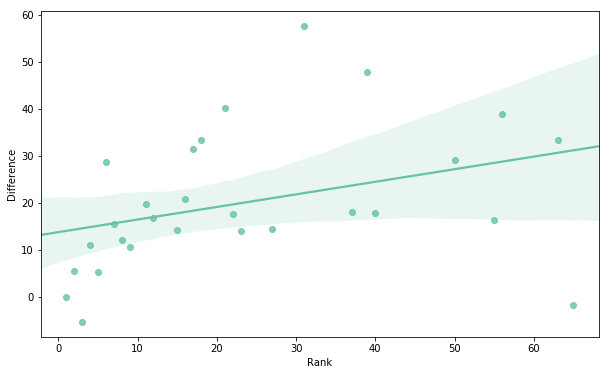

In [32]:
#Create a scatterplot to see if there is a correlation between rank and difference in win percentage
fig, ax = plt.subplots(1,1, figsize = (10,6))
sns.set_palette('Set2')
sns.regplot(x = 'Rank', y = 'Difference', data = wc_result_diff_2014)


Text(0.5,1,'Correlation between win percentage and FIFA rank of countries')

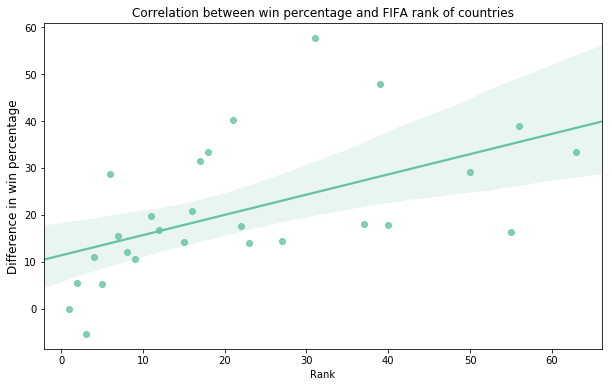

In [33]:
# Creating a subset of wc_result_diff to remove Japan since it seems like an outlier
no_russia = wc_result_diff_2014[wc_result_diff_2014.Country != 'Russia']

#Create a scatterplot without Japan
fig, ax = plt.subplots(1,1, figsize = (10,6))
sns.set_palette('Set2')
sns.regplot(x = 'Rank', y = 'Difference', data = no_russia)
ax.set_ylabel('Difference in win percentage', fontsize = 12)
ax.set_title('Correlation between win percentage and FIFA rank of countries')

In [34]:
#Add total matches played column to wc_result_diff
wc_result_diff = wc_result_diff.merge(home_counts, left_on = 'Country', right_on = 'Country', how = 'inner')
wc_result_diff=wc_result_diff.rename(columns = {'matches_played':'home_matches_played'})
wc_result_diff = wc_result_diff.merge(away_counts, left_on = 'Country', right_on = 'Country', how = 'inner')
wc_result_diff=wc_result_diff.rename(columns = {'matches_played':'away_matches_played'})
wc_result_diff['total_matches_played'] = 0
wc_result_diff['total_matches_played'] = wc_result_diff['home_matches_played'] + wc_result_diff['away_matches_played']
wc_result_diff

,Country,Difference,Rank,home_matches_played,away_matches_played,total_matches_played
0,Egypt,33.888180,31,368,247,615
1,Nigeria,32.009772,50,256,291,547
2,Morocco,28.984287,40,264,243,507
3,Argentina,28.549177,4,535,420,955
4,Tunisia,28.002602,27,290,265,555
5,Senegal,25.080649,23,207,301,508
6,Peru,24.713805,11,270,330,600
7,Panama,24.680851,56,188,220,408
8,Mexico,21.165097,16,493,346,839
9,Saudi Arabia,20.894768,63,350,243,593


In [35]:
#Add total matches played column to wc_result_diff_2014
#SINCE 2014
wc_result_diff_2014 = wc_result_diff_2014.merge(home_counts_2014, left_on = 'Country', right_on = 'Country', how = 'inner')
wc_result_diff_2014=wc_result_diff_2014.rename(columns = {'matches_played':'home_matches_played'})
wc_result_diff_2014 = wc_result_diff_2014.merge(away_counts_2014, left_on = 'Country', right_on = 'Country', how = 'inner')
wc_result_diff_2014=wc_result_diff_2014.rename(columns = {'matches_played':'away_matches_played'})
wc_result_diff_2014['total_matches_played'] = 0
wc_result_diff_2014['total_matches_played'] = wc_result_diff_2014['home_matches_played'] + wc_result_diff_2014['away_matches_played']
wc_result_diff_2014.head()

,Country,Difference,Rank,home_matches_played,away_matches_played,total_matches_played
0,Egypt,57.777778,31,25,18,43
1,Australia,47.826087,39,23,23,46
2,Uruguay,40.153453,21,17,23,40
3,Panama,38.888889,56,18,30,48
4,Saudi Arabia,33.384615,63,26,25,51


In [36]:
wc_result_diff

,Country,Difference,Rank,home_matches_played,away_matches_played,total_matches_played
0,Egypt,33.888180,31,368,247,615
1,Nigeria,32.009772,50,256,291,547
2,Morocco,28.984287,40,264,243,507
3,Argentina,28.549177,4,535,420,955
4,Tunisia,28.002602,27,290,265,555
5,Senegal,25.080649,23,207,301,508
6,Peru,24.713805,11,270,330,600
7,Panama,24.680851,56,188,220,408
8,Mexico,21.165097,16,493,346,839
9,Saudi Arabia,20.894768,63,350,243,593


Text(0.5,1,'Relation between number of matches played and FIFA rank')

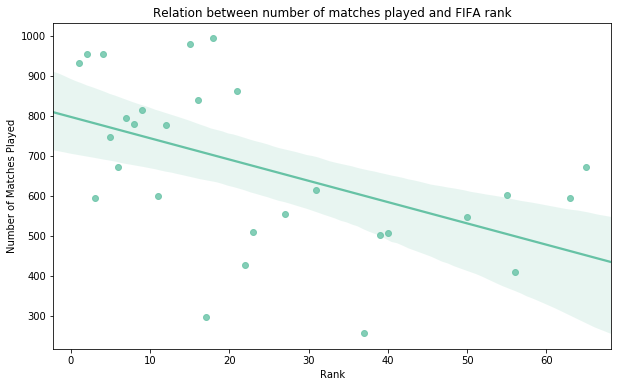

In [37]:
#Create a scatterplot to see if there is a correlation between rank and difference in win percentage
fig, ax = plt.subplots(1,1, figsize = (10,6))
sns.set_palette('Set1')
sns.regplot(x = 'Rank', y = 'total_matches_played', data = wc_result_diff);
ax.set_ylabel('Number of Matches Played')
ax.set_title('Relation between number of matches played and FIFA rank')

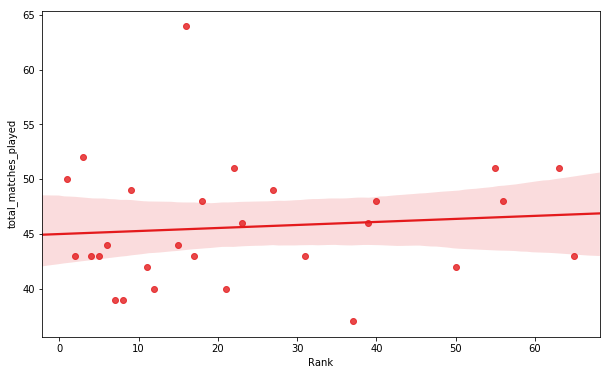

In [38]:
#Create a scatterplot to see if there is a correlation between rank and difference in win percentage
#SINCE 2014
fig, ax = plt.subplots(1,1, figsize = (10,6))
sns.set_palette('Set1')
sns.regplot(x = 'Rank', y = 'total_matches_played', data = wc_result_diff_2014);

In [39]:
#Create Data Frame with that has number of home and away win matches
total_results = pd.DataFrame(columns = ['Result', 'Team', 'Number of Matches'])
total_results['Result'] = ['Win',  'Win']
total_results['Team'] = ['Home', 'Away', ]
total_results['Number of Matches'] = [ pd.Series(home_total['home_win']).sum(), pd.Series(away_total['away_win']).sum()]
total_results['Percentage of Matches Won'] = total_results['Number of Matches']/pd.Series(total_results['Number of Matches']).sum()*100
total_results

,Result,Team,Number of Matches,Percentage of Matches Won
0,Win,Home,6289,62.033932
1,Win,Away,3849,37.966068


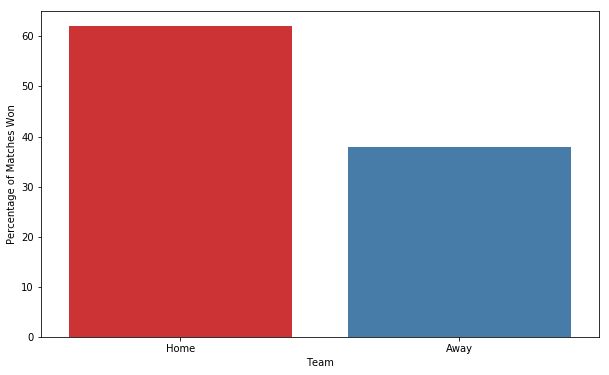

In [40]:
#Create barplot that has the percentage of matches won when played at home or away
fig,ax = plt.subplots(1,1, figsize = (10,6))
sns.barplot(x="Team", y="Percentage of Matches Won", data=total_results)

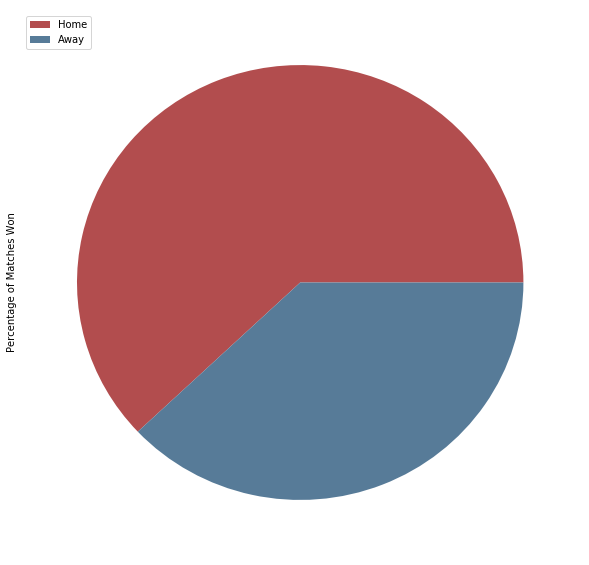

In [41]:
#Create a pie chart to visualize the above data
fig,ax = plt.subplots(1,1,figsize =(10,10))
sns.set_palette("Set1", n_colors=8, desat=.5)
total_results['Percentage of Matches Won'].plot(kind ='pie', labels = None, )
ax.legend(loc="upper left", labels=total_results['Team'])

In [42]:
fifa_rank = pd.read_csv("fifa_ranking.csv", encoding = "ISO-8859-1")
fifa_rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [43]:
#Load past world cup winners data
wc_data = pd.read_csv('WorldCups.csv', encoding = "ISO-8859-1")
wc_data.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.7
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768.607


In [44]:
#Create a column to see if home team makes it to semis
wc_data['home_adv'] = 0
wc_data['home_adv'].loc[wc_data['Country'] == wc_data['Winner']] = 1
wc_data['home_adv'].loc[wc_data['Country'] == wc_data['Runners-Up']] = 1
wc_data['home_adv'].loc[wc_data['Country'] == wc_data['Third']] = 1
wc_data['home_adv'].loc[wc_data['Country'] == wc_data['Fourth']] = 1

wc_data

/Users/nikitaroy/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,home_adv
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549,1
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363,1
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.7,0
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246,1
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768.607,0
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.81,1
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172,1
7,1966,England,England,Germany,Portugal,Soviet Union,89,16,32,1.563.135,1
8,1970,Mexico,Brazil,Italy,Germany,Uruguay,95,16,32,1.603.975,0
9,1974,Germany,Germany,Netherlands,Poland,Brazil,97,16,38,1.865.753,0


In [45]:
# Create new column in wc_result_diff that counts the number of times current wc countries reached top 4 in previous wcs
wc_result_diff['previous_result'] = 0
wc_result_diff['previous_result'].loc[wc_result_diff['Country'].isin(wc_data['Winner'])] = wc_result_diff['previous_result'] + 1
wc_result_diff['previous_result'].loc[wc_result_diff['Country'].isin(wc_data['Runners-Up'])] = wc_result_diff['previous_result'] + 1
wc_result_diff['previous_result'].loc[wc_result_diff['Country'].isin(wc_data['Third'])] = wc_result_diff['previous_result'] + 1
wc_result_diff['previous_result'].loc[wc_result_diff['Country'].isin(wc_data['Fourth'])] = wc_result_diff['previous_result'] + 1

#Create new data frame that only includes current wc countries and previous semifinalists
wc_previous_results = wc_result_diff.loc[wc_result_diff['previous_result'] != 0]
wc_previous_results = wc_previous_results.sort_values(by = 'previous_result', ascending = False)

wc_result_diff




/Users/nikitaroy/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Country,Difference,Rank,home_matches_played,away_matches_played,total_matches_played,previous_result
0,Egypt,33.888180,31,368,247,615,0
1,Nigeria,32.009772,50,256,291,547,0
2,Morocco,28.984287,40,264,243,507,0
3,Argentina,28.549177,4,535,420,955,2
4,Tunisia,28.002602,27,290,265,555,0
5,Senegal,25.080649,23,207,301,508,0
6,Peru,24.713805,11,270,330,600,0
7,Panama,24.680851,56,188,220,408,0
8,Mexico,21.165097,16,493,346,839,0
9,Saudi Arabia,20.894768,63,350,243,593,0


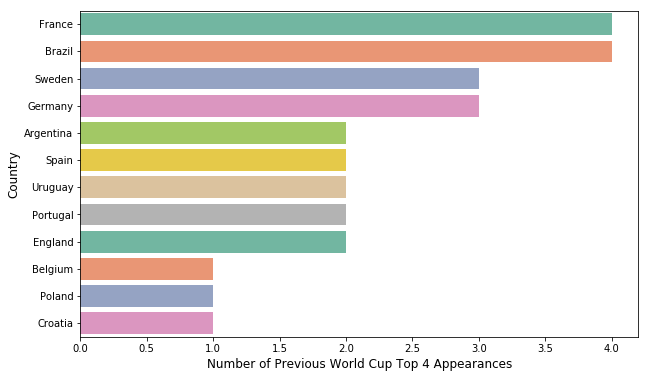

In [46]:
#Create barplot of previous semifinalists
fig, ax = plt.subplots(1,1, figsize = (10,6))
sns.barplot(x = 'previous_result', y = 'Country', data = wc_previous_results, palette = 'Set2')
ax.set_xlabel("Number of Previous World Cup Top 4 Appearances", fontsize = 12)
ax.set_ylabel("Country", fontsize = 12);

In [47]:
#Load GDP data
gdp = pd.read_csv('GDP.csv', encoding = "ISO-8859-1")
wc_result_gdp = wc_result_diff.merge(gdp, left_on = 'Country', right_on = 'Country', how = 'inner')
wc_result_gdp['Country']

0            Egypt
1          Nigeria
2          Morocco
3        Argentina
4          Tunisia
5          Senegal
6             Peru
7           Panama
8           Mexico
9     Saudi Arabia
10           Spain
11         Belgium
12         Uruguay
13        Portugal
14          France
15          Brazil
16          Russia
17         Denmark
18          Sweden
19     Switzerland
20          Poland
21       Australia
22          Serbia
23         Croatia
24         Iceland
25         England
26         Germany
27           Japan
Name: Country, dtype: object

In [48]:
wc_result_diff['Country']

0            Egypt
1          Nigeria
2          Morocco
3        Argentina
4          Tunisia
5          Senegal
6             Peru
7           Panama
8           Mexico
9     Saudi Arabia
10           Spain
11         Belgium
12         Uruguay
13        Portugal
14          France
15          Brazil
16          Russia
17         Denmark
18          Sweden
19     Switzerland
20          Poland
21       Australia
22          Serbia
23         Croatia
24         Iceland
25         England
26         Germany
27           Japan
Name: Country, dtype: object

In [49]:
wc_result_gdp = wc_result_gdp.sort_values(by = 'Ranking')
wc_result_gdp

,Country,Difference,Rank,home_matches_played,away_matches_played,total_matches_played,previous_result,Ranking,GDP
24,Iceland,14.770925,22,200,227,427,0,105,"23,909"
16,Russia,17.708333,65,288,384,672,0,11,"1,577,524"
5,Senegal,25.080649,23,207,301,508,0,117,"16,375"
21,Australia,16.399062,39,285,217,502,0,13,"1,323,421"
10,Spain,20.484472,6,350,322,672,2,14,"1,311,320"
8,Mexico,21.165097,16,493,346,839,0,15,"1,149,919"
9,Saudi Arabia,20.894768,63,350,243,593,0,19,"683,827"
19,Switzerland,16.989056,8,395,384,779,0,20,"678,887"
3,Argentina,28.549177,4,535,420,955,2,21,"637,590"
18,Sweden,17.538171,18,476,519,995,3,22,"538,040"
